# ARIMA Modelling

## Introduction

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

https://towardsdatascience.com/arima-model-in-python-7bfc7fb792f9

What is Time Series Data?
>When the data is indexed in a form where the data points are the magnitude of changes occurring with time, that data can be considered as the **time-series data**. Depending on the frequency, a time series can be of yearly (ex: annual budget), quarterly (ex: expenses), monthly (ex: air traffic), weekly (ex: sales qty), daily (ex: weather), hourly (ex: stocks price), minutes (ex: inbound calls in a call canter) and even seconds wise (ex: web traffic). Since time acts as a reference point in relation to the entire procedure, it can be noticed that time-series always depicts a relationship between two variables in which one is time and the other one is any quantitative variable. We refer to a series of data points indexed (or graphed) in time order as a time series. 

A time series can be broken down into 3 components:
- Trend: Upward & downward movement of the data with time over a large period of time (i.e. house appreciation)
- Seasonality: Seasonal variance (i.e. an increase in demand for ice cream during summer)
- Noise: Spikes & troughs at random intervals
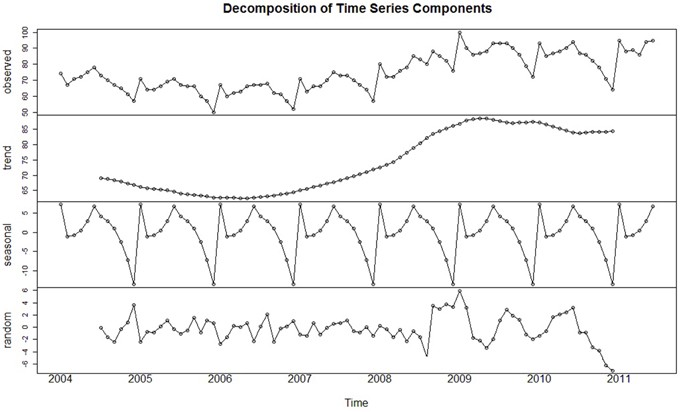

The types of time series data:
- Time series data: A set of observations contains values, taken by variable at different times.
- Cross-sectional data: Data values of one or more variables, gathered at the same time-point.
- Pooled data: A combination of time series data and cross-sectional data.

What is Time Series Analysis?
>"Time series analysis is a statistical technique dealing in time series data, or trend analysis." Time Series Analysis finds hidden patterns and helps obtain useful insights from the time series data. Time Series Analysis is useful in predicting future values or detecting anomalies from the data.  Such analysis typically requires many data points to be present in the dataset to ensure consistency and reliability. An extensive data set ensures that you have a representative sample size and that the analysis performed can cut through the noisy data. It helps organizations understand what the underlying causes of trends or systemic patterns detected over time are.

The different types of models and analyses that can be created through time series analysis are:
- Classification: To Identify and assign categories to the data.
- Curve fitting: Plot the data along a curve and study the relationships of variables present within the data.
- Descriptive analysis: Help Identify certain patterns in time-series data such as trends, cycles, or seasonal variation.
- Explanative analysis: To understand the data and its relationships, the dependent features, and cause and effect and its tradeoff.
- Exploratory analysis: Describe and focus on the main characteristics of the time series data, usually in a visual format.
- Forecasting: Predicting future data based on historical trends. Using the historical data as a model for future data and predicting scenarios that could happen along with the future plot points.
- Intervention analysis: The Study of how an event can change the data.
- Segmentation: Splitting the data into segments to discover the underlying properties from the source information.

Forecasting is the next step where we want to predict the future values the series is going to take.Because, forecasting a time series (like demand and sales) is often of tremendous commercial value. So this is one of the important domains of data science where we forecast the future value according to the history in the time series. In forecasting, we have many models that help us make predictions and forecast the values to fulfil our future aspects according to the situation’s demand. The examples of models can be  AR, MA, ARIMA, SARIMA, VAR, SARIMAX etc.A time series is a sequence where a metric is recorded over regular time intervals.

Now forecasting a time series can be broadly divided into two types:
- If you use only the previous values of the time series to predict its future values, it is called **Univariate Time Series Forecasting**.
- And if you use predictors other than the series (a.k.a exogenous variables) to forecast it is called **Multi Variate Time Series Forecasting**.

Methods for Time Series Forecasting:
- Naive Approach: In this forecasting technique, the value of the new data point is predicted to be equal to the previous data point. The result would be a flat line, since all new values take the previous values.
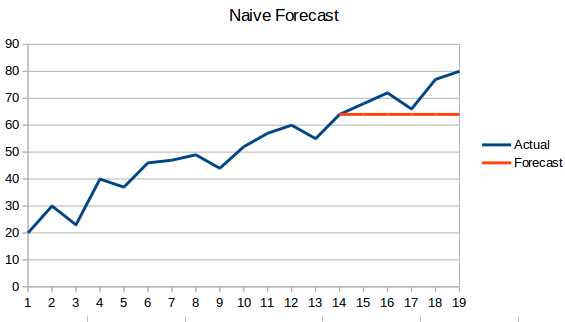
- Simple Average: The next value is taken as the average of all the previous values. The predictions here are better than the ‘Naive Approach’ as it doesn’t result in a flat line but here, all the past values are taken into consideration which might not always be useful. For instance, when asked to predict today’s temperature, you would consider the last 7 days’ temperature rather than the temperature a month ago.

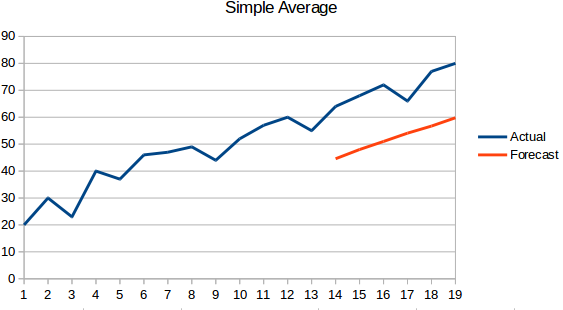
- Moving Average : This is an improvement over the previous technique. Instead of taking the average of all the previous points, the average of ‘n’ previous points is taken to be the predicted value.

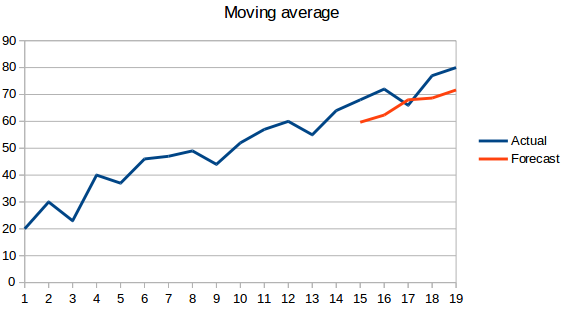
- Weighted moving average : A weighted moving average is a moving average where the past ‘n’ values are given different weights.

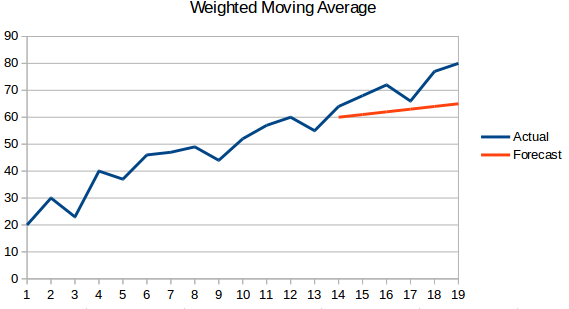
- Simple Exponential Smoothing: In this technique, larger weights are assigned to more recent observations than to observations from the distant past.

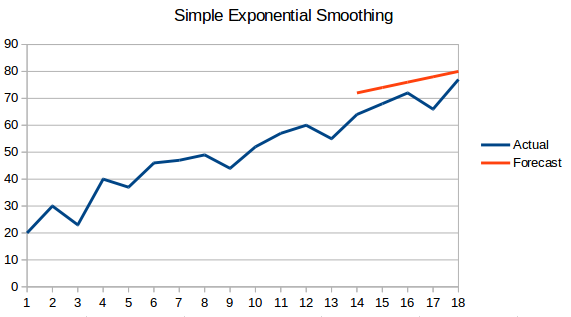
- Holt’s Linear Trend Model: This method takes into account the trend of the dataset. By trend, we mean the increasing or decreasing nature of the series. Suppose the number of bookings in a hotel increases every year, then we can say that the number of bookings show an increasing trend. The forecast function in this method is a function of level and trend.

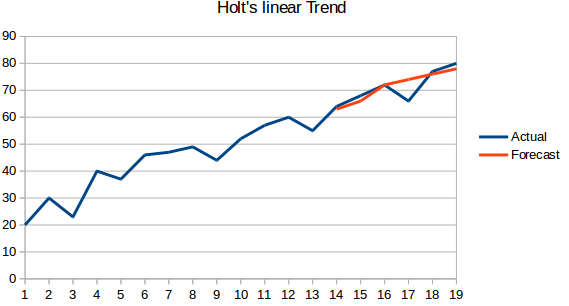
- Holt Winters Method: This algorithm takes into account both the trend and the seasonality of the series. For instance – the number of bookings in a hotel is high on weekends & low on weekdays, and increases every year; there exists a weekly seasonality and an increasing trend.

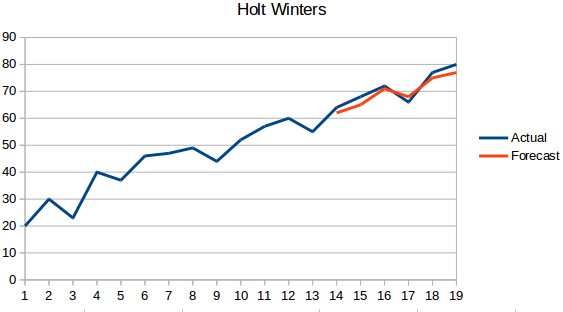
- ARIMA: ARIMA is a very popular technique for time series modeling. It describes the correlation between data points and takes into account the difference of the values. An improvement over ARIMA is SARIMA (or seasonal ARIMA).

## Content

1. <a href = "#1.-Introduction-to-ARIMA">Introduction to ARIMA</a>
2. <a href = "#2.-Steps-for-ARIMA-implementation">Steps for ARIMA implementation</a>
3. <a href = "#3.-Why-do-we-need-Auto-ARIMA?">Why do we need Auto ARIMA?</a>
4. <a href = "#4.-Auto-ARIMA-implementation">Auto ARIMA implementation</a>
5. <a href = "#5.-How-does-auto-ARIMA-selects-parameters?">How does auto ARIMA selects parameters?</a>

### Libraries

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset
register_matplotlib_converters()
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error

In [29]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


## 1. Introduction to ARIMA

ARIMA stands for **Auto-Regressive Integrated Moving Averages**. ARIMA is a very popular statistical method for time series forecasting. ARIMA is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models. ARIMA models work on the following assumptions –

- The data series is stationary, which means that the mean and variance should not vary with time. A series can be made stationary by using log transformation or differencing the series.
- The data provided as input must be a univariate series, since ARIMA uses the past values to predict the future values.

ARIMA has three components:
- AR (autoregressive term): AR term refers to the past values used for forecasting the next value. The AR term is defined by the parameter **‘p’** in arima. The value of ‘p’ is determined using the PACF plot.
- I (differencing term): Order of differencing  specifies the number of times the differencing operation is performed on series to make it stationary. Test like ADF and KPSS can be used to determine whether the series is stationary and help in identifying the **'d'** value.
- MA (moving average term): MA term is used to defines number of past forecast errors used to predict the future values. The parameter **‘q’** in arima represents the MA term. ACF plot is used to identify the correct ‘q’ value.

The ARIMA model can be applied when we have seasonal or non-seasonal data. The difference is that when we have seasonal data we need to add some more parameters to the model.

For non-seasonal data the parameters are:
- p: The number of lag observations the model will use
- d: The number of times that the raw observations are differenced till stationarity.
- q: The size of the moving average window.

For seasonal data we need to add also the following:
- P: The number of seasonal lag observations the model will use
- D: The number of times that the seasonal observations are differenced till stationarity.
- Q: The size of the seasonal moving average window.
- m: The number of observations of 1 season
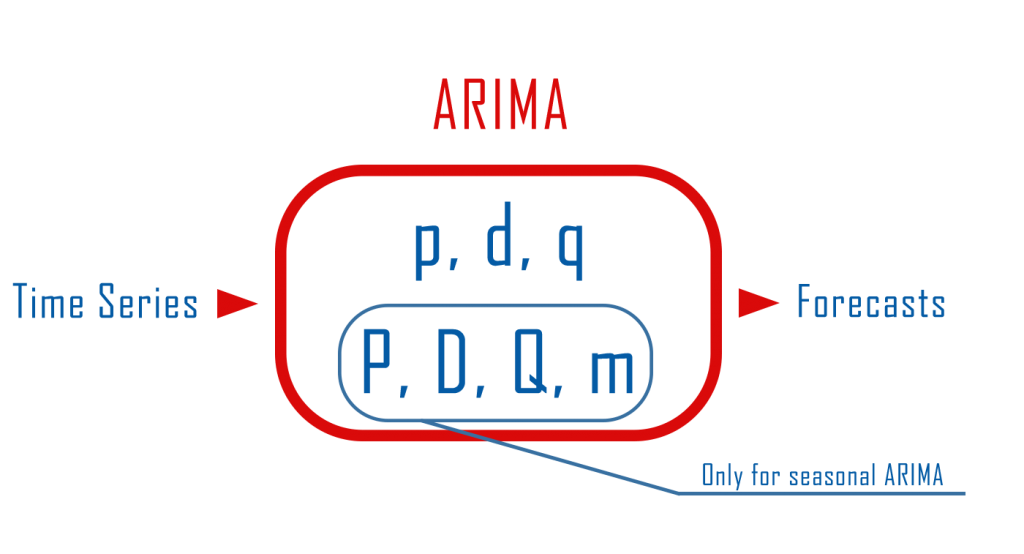

[<a href="#Content">Back to Content</a>]

## 2. Steps for ARIMA implementation

The general steps to implement an ARIMA model are –

1. Load the data: The first step for model building is of course to load the dataset
2. Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.
3. Make series stationary: The first step to build an ARIMA model is to make the time series stationary. In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations.
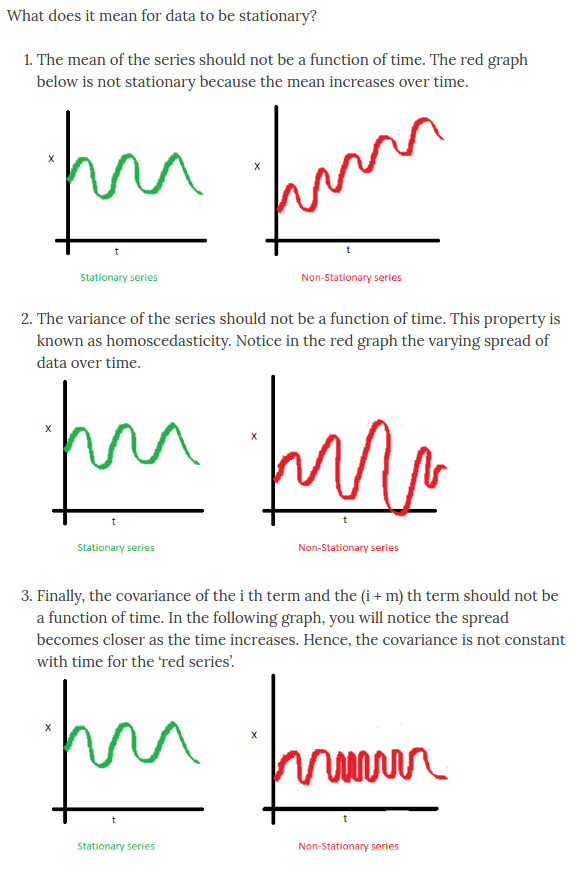

>**Why?** - Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

>**So how to make a series stationary?** - The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0. Next, what are the ‘p’ and ‘q’ terms? ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

4. Look at your time series to understand if they are Seasonal or Non-Seasonal.
5. Determine d value: Apply differencing to time series and seasonal difference if needed to reach stationarity to get an estimate for d and D values.
6. Create ACF and PACF plots: Plot the Autocorrelation and Partial Autocorrelation plots to help you estimate the p, P, and q, Q values.
7. Fit ARIMA model: Fine-tune the model if needed changing the parameters according to the general rules of ARIMA
8. Predict values on validation set: Predict the future values
9. Calculate RMSE: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set

In [30]:
#Reading Dataset from csv file
basepath = '../../Data\\'
df = pd.read_csv(basepath+ 'AirPassengers.csv', parse_dates = ['Month'], index_col = ['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


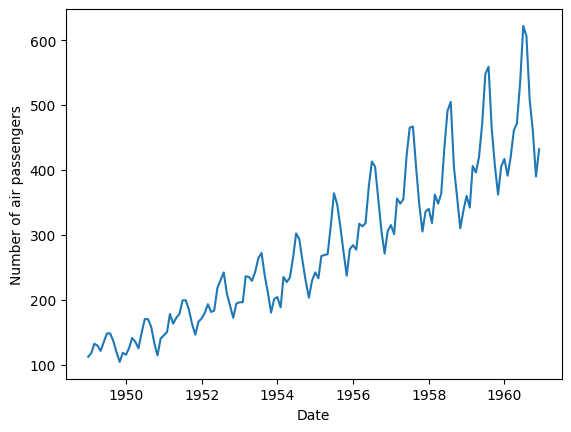

In [31]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

There are two primary way to determine whether a given time series is stationary:
- Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).
- Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

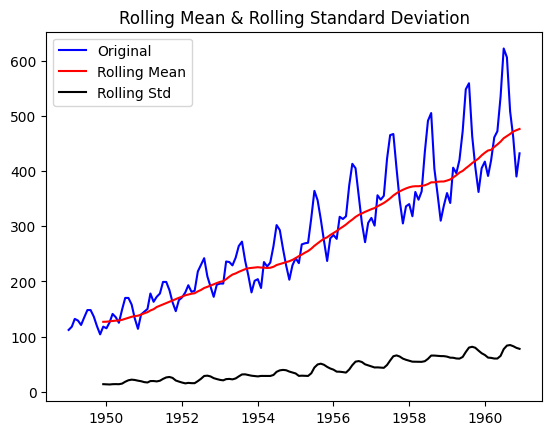

In [32]:
#Rolling Statistics
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

>As you can see, the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

In [33]:
#ADF Test
result = adfuller(df['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


>The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05),which means data is accepting the null hypothesis. Thus, we can conclude that the time series is not stationary.

**Transform Non-Stationary to Stationary using Differencing (the d and D parameters)**

The next step is to transform our data to Stationary so we will have an estimate for d and D parameters we will use in the model. This can be done using Differencing and it’s performed by subtracting the previous observation from the current observation.

difference(T) = observation(T) — observation(T-1)

Then, we will test it again for stationarity using the Augmented Dickey-Fuller test and if it’s stationary we will proceed to our next step. If not we will apply differencing again till we have a stationary series. Differencing can be done very easily with pandas using the shift function.

<AxesSubplot: xlabel='Month'>

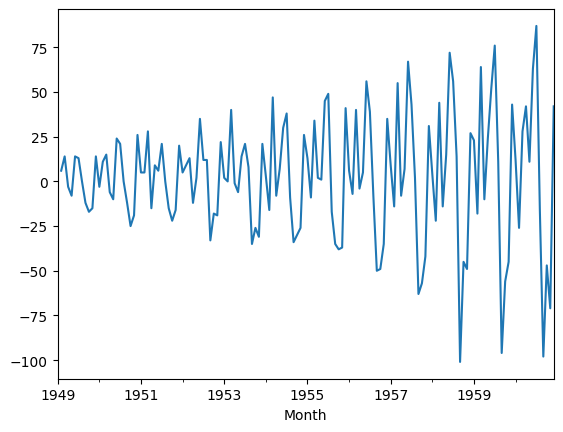

In [34]:
df['1difference']=df['#Passengers']-df['#Passengers'].shift(1)
df['1difference'].plot()

>It seems that we removed the trend and the series is Stationary. However, we will use the Augmented Dickey-Fuller test to prove it.

In [35]:
#note we are dropping na values because the first value of the first difference is NA
result=adfuller(df['1difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -2.8292668241699923,
 'pvalue': 0.054213290283826474,
 'usedlag': 12,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 988.5069317854084}

>As you can see we fail to reject the null hypothesis because we have a p-value>0.05. That suggests that the series is not stationary and we need to use differencing again taking the second difference. The second difference can be computed as the first but this time instead of using the observations, we will use the first difference.

<AxesSubplot: xlabel='Month'>

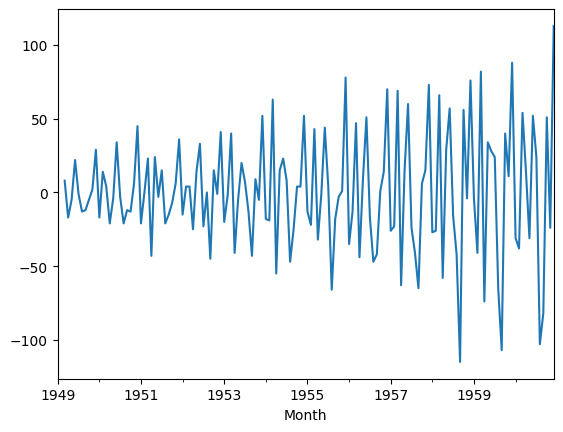

In [36]:
df['2difference']=df['1difference']-df['1difference'].shift(1)
df['2difference'].plot()

In [37]:
result=adfuller((df['2difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -16.384231542468516,
 'pvalue': 2.7328918500141235e-29,
 'usedlag': 11,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 988.602041727561}

>The p-value is less than 0.05 so we can reject the null hypothesis. That means the second difference is stationary and that suggests that a good estimate for the value d is 2.

Our data are seasonal so we need to estimate also the **D** value which is the same as the d value but for Seasonal Difference. The seasonal difference can be computed by shifting the data by the number of rows per season (in our example 12 months per year) and subtracting them from the previous season. This is not the first seasonal difference. If we get that the seasonal difference is stationary then the D value will be 0. If not then we will compute the seasonal first difference.

seasonal difference(T) = observation(T) — observation(T-12)

seasonal first difference(T) = seasonal difference(T) — seasonal difference(T-1)

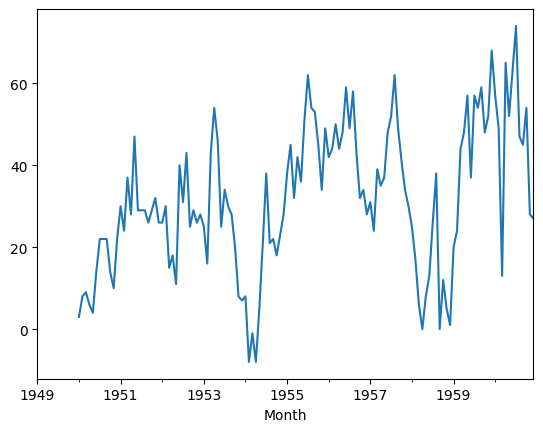

In [38]:
df['Seasonal_Difference']=df['#Passengers']-df['#Passengers'].shift(12)
ax=df['Seasonal_Difference'].plot()

In [39]:
result=adfuller((df['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -3.383020726492481,
 'pvalue': 0.011551493085514952,
 'usedlag': 1,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 919.527129208137}

>The p-value is less than 0.05 thus it’s stationary and we don’t have to use differencing. That suggests using 0 for the D value.

**Autocorrelation and Partial Autocorrelation Plots (p,q, and P, Q parameters)**

The last step before the ARIMA model is to create the Autocorrelation and Partial Autocorrelation Plots to help us estimate the p,q, P, and Q parameters.
There are some very useful rules for ARIMA and Seasonal ARIMA models that we are using to help us estimate the parameters by looking at the Autocorrelation and Partial Autocorrelation Plots. We will create the plots for the second difference and the seasonal difference of our time series because these are the stationary series we end up using in ARIMA (d=2, D=0).

First, let’s plot ACF and PACF for the second difference.

c:\program files\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


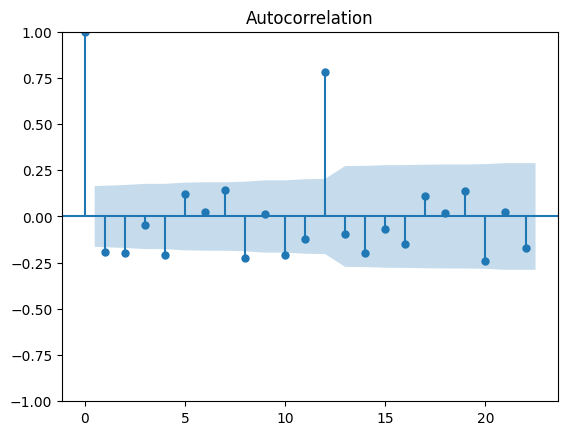

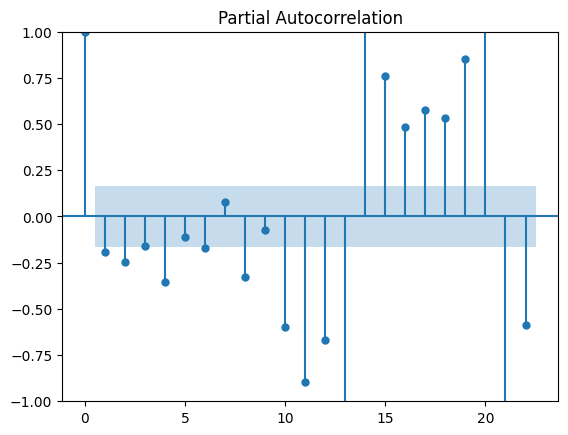

In [40]:
fig1=plot_acf(df['2difference'].dropna())
fig2=plot_pacf(df['2difference'].dropna())

>We can see that we have a sharp cut-off at lag-1 in both of our plots. According to the rules we mentioned above, this suggests using an AR and MA term. In other words, p=1 and q=1.

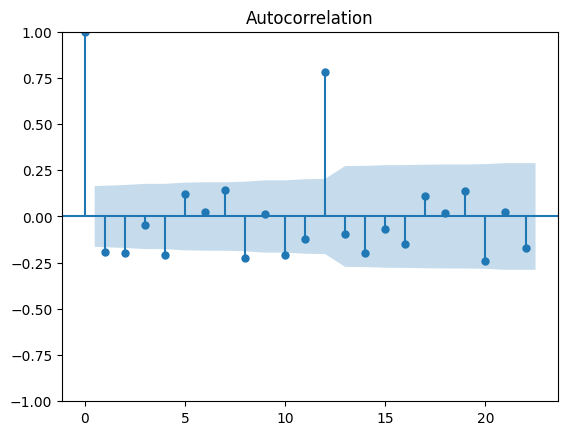

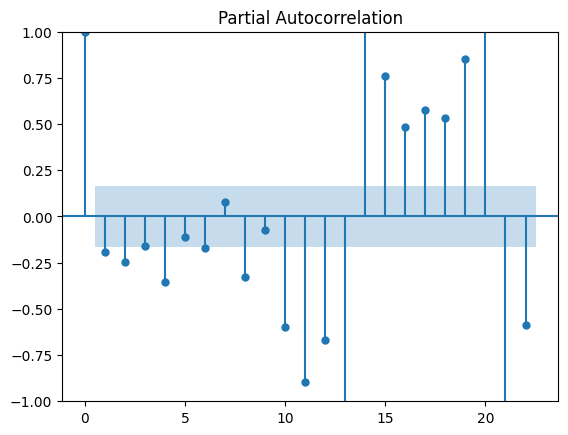

In [41]:
#Now, we need the same plots of Seasonal Difference
fig1=plot_acf(df['2difference'].dropna())
fig2=plot_pacf(df['2difference'].dropna())

>We have a gradual decrease in the Autocorrelation plot and a sharp cut-off in the Partial Autocorrelation plot. This suggests using AR and not over the value of 1 for the seasonal part of the ARIMA.

In [42]:
#ARIMA Model
model=SARIMAX(df['#Passengers'],order=(1,2,1),seasonal_order=(1, 0, 0, 12))
result=model.fit()

c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


We can plot the residuals of the model to have an idea on how well the model is fitted. Basically, the residuals are the difference between the original values and the predicted values from the model.

<AxesSubplot: ylabel='Density'>

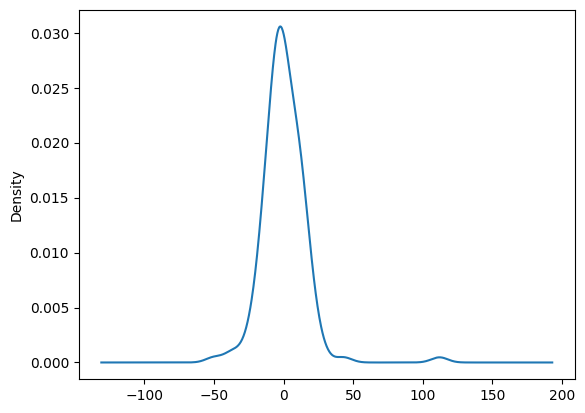

In [43]:
result.resid.plot(kind='kde')

It’s time for a forecast. We will create some future dates to add them to our data so we can predict the future values.

In [44]:
new_dates=[df.index[-1]+DateOffset(months=x) for x in range(1,48)]
df_pred=pd.DataFrame(index=new_dates,columns =df.columns)
df_pred.head()

,#Passengers,1difference,2difference,Seasonal_Difference
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN


The ARIMA model predicts taking as arguments the start and the end of the enumerated index and not the date range.
We created an empty data frame having indexes future dates and we concatenated them in our original data. Our data had 144 rows and the new dada we added have 48 rows. Therefore, to get the predictions only for the future data, we will predict from row 143 to 191.

<AxesSubplot: >

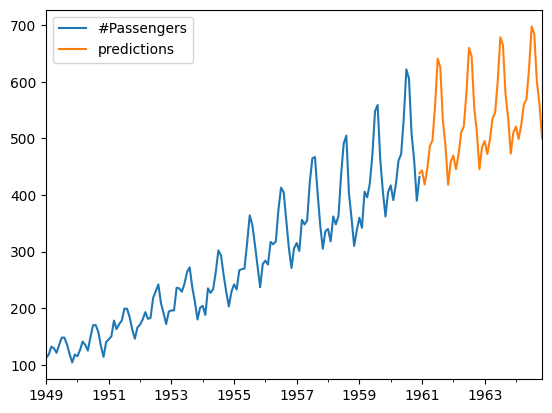

In [45]:
df2=pd.concat([df,df_pred])
df2['predictions']=result.predict(start=143,end=191)
df2[['#Passengers','predictions']].plot()

[<a href="#Content">Back to Content</a>]

## 3. Why do we need Auto ARIMA?

Although ARIMA is a very powerful model for forecasting time series data, the data preparation and parameter tuning processes end up being really time consuming. Before implementing ARIMA, we need to make the series stationary, and determine the values of p and q using the plots we discussed. Auto ARIMA makes this task really simple for us.Below are the steps we should follow for implementing auto ARIMA:
- Load the data: This step will be the same. Load the data into your notebook
- Preprocessing data: The input should be univariate, hence drop the other columns
- Fit Auto ARIMA: Fit the model on the univariate series
- Predict values on validation set: Make predictions on the validation set
- Calculate RMSE: Check the performance of the model using the predicted values against the actual values

As we see, we have completely bypassed the selection of p and q feature.

[<a href="#Content">Back to Content</a>]

## 4. Auto ARIMA implementation

In [46]:
#Reading Dataset from csv file
basepath = '../../Data\\'
data = pd.read_csv(basepath+ 'AirPassengers.csv')#, parse_dates = ['Month'], index_col = ['Month'])
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_6772\1954908157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Month',axis=1,inplace=True)
C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_6772\1954908157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.drop('Month',axis=1,inplace=True)


<AxesSubplot: >

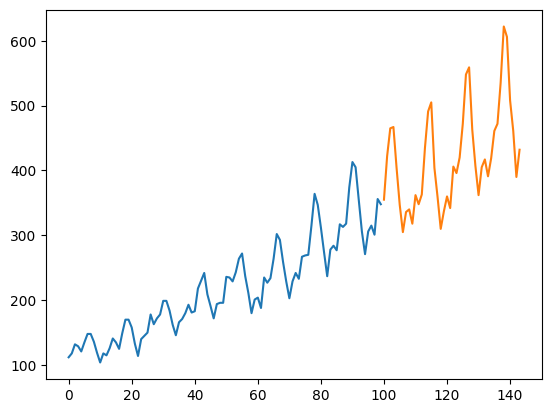

In [47]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)

#plotting the data
train['#Passengers'].plot()
valid['#Passengers'].plot()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.769, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=907.370, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=904.979, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=908.785, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=900.136, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=904.858, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=898.911, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=903.548, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=906.025, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=896.369, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=903.746, Time=0.02 se

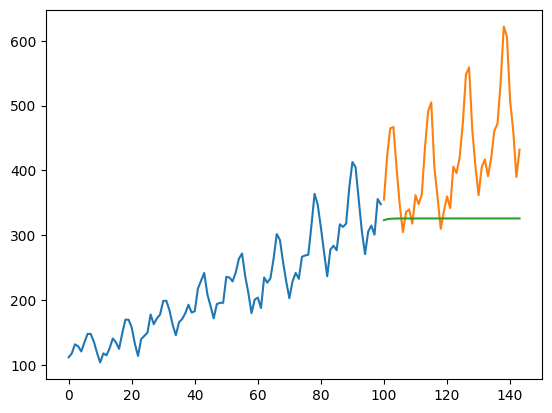

In [48]:
#building the model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [49]:
#calculate rmse
rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

122.02363913877787


[<a href="#Content">Back to Content</a>]

## 5. How does auto ARIMA selects parameters?

We simply used the .fit() command to fit the model without having to select the combination of p, q, d. Auto ARIMA takes into account the AIC and BIC values generated (as you can see in the code) to determine the best combination of parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators to compare models. The lower these values, the better is the model.

[<a href="#Content">Back to Content</a>]

In [ ]:
#Tested:no errors